# Machine Learning Models for Energy Analytics

## Overview
This notebook implements three types of machine learning models to analyse energy consumption and CO₂ emissions:
1. **Linear Regression** - Predicting energy consumption
2. **K-Means Clustering** - Grouping countries by energy profiles
3. **Decision Tree Classification** - Classifying energy categories

## Learning Objectives
- Understand supervised vs unsupervised learning
- Implement regression, clustering, and classification models
- Evaluate model performance using appropriate metrics
- Interpret model results for business insights

## Libraries Used
- **scikit-learn**: Machine learning algorithms and tools
- **pandas/numpy**: Data manipulation
- **matplotlib/seaborn**: Visualisation

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error,
                             silhouette_score, classification_report, confusion_matrix,
                             accuracy_score)
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Cleaned Data

In [2]:
from pathlib import Path
import os

current_dir = Path.cwd()
parent = current_dir.parent

os.chdir(parent)
current_dir = str(Path.cwd())   # update the variable so future code is consistent
print("New current directory:", current_dir)
processed_file_path = current_dir+'\\dataset\\processed\\cleaned_energy_data.csv'
df = pd.read_csv(processed_file_path)

New current directory: d:\Code Institute\Energy-Consumption-CO2-Emissions-Analysis


In [3]:
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset shape: (46000, 16)

Columns: ['Country', 'Energy_type', 'Year', 'Energy_consumption', 'Energy_production', 'GDP', 'Population', 'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission', 'Energy_category', 'Energy_balance', 'CO2_per_capita', 'Energy_efficiency', 'Decade', 'Energy_source_type']


,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Energy_category,Energy_balance,CO2_per_capita,Energy_efficiency,Decade,Energy_source_type
0,Afghanistan,coal,1980,0.002479,0.002355,NaN,13356.5,1.990283,0.0,0.0,coal,-0.000124,0.0,NaN,1980,Fossil Fuel
1,Afghanistan,natural_gas,1980,0.002094,0.062820,NaN,13356.5,1.990283,0.0,0.0,natural gas,0.060726,0.0,NaN,1980,Fossil Fuel
2,Afghanistan,petroleum_n_other_liquids,1980,0.014624,0.000000,NaN,13356.5,1.990283,0.0,0.0,petroleum,-0.014624,0.0,NaN,1980,Fossil Fuel
3,Afghanistan,nuclear,1980,0.000000,0.000000,NaN,13356.5,1.990283,0.0,0.0,nuclear,0.000000,0.0,0.0,1980,Nuclear
4,Afghanistan,renewables_n_other,1980,0.007386,0.007386,NaN,13356.5,1.990283,0.0,0.0,renewables,0.000000,0.0,NaN,1980,Renewable


## 2. Linear Regression - Predicting Energy Consumption

### Objective
Predict energy consumption based on GDP, Population, and Year.

### Why Linear Regression?
- Simple, interpretable model
- Works well for continuous target variables
- Provides insights into feature importance through coefficients

In [4]:
# Prepare data for regression
regression_df = df[['GDP', 'Population', 'Year', 'Energy_consumption']].dropna()
print(f"Dataset size: {len(regression_df):,} records")

# Features and target
X_reg = regression_df[['GDP', 'Population', 'Year']]
y_reg = regression_df['Energy_consumption']

# Split data (80% train, 20% test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"\nTraining set: {len(X_train_reg):,} samples")
print(f"Test set: {len(X_test_reg):,} samples")

Dataset size: 33,155 records

Training set: 26,524 samples
Test set: 6,631 samples


In [6]:
# Scale features (important for many ML algorithms)
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)
print("✓ Features scaled using StandardScaler")
print(f"\nScaled feature means: {X_train_reg_scaled.mean(axis=0)}")
print(f"Scaled feature std devs: {X_train_reg_scaled.std(axis=0)}")

✓ Features scaled using StandardScaler

Scaled feature means: [-2.94675392e-18 -1.63410899e-17 -7.20159869e-15]
Scaled feature std devs: [1. 1. 1.]


In [7]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_reg_scaled, y_train_reg)

print("✓ Linear Regression model trained")
print(f"\nModel intercept: {lr_model.intercept_:.6f}")
print(f"\nModel coefficients:")
for feature, coef in zip(X_reg.columns, lr_model.coef_):
    print(f"  {feature}: {coef:.6f}")

✓ Linear Regression model trained

Model intercept: 0.486724

Model coefficients:
  GDP: 1.816633
  Population: 0.137470
  Year: -0.069418


In [8]:
# Make predictions
y_pred_train = lr_model.predict(X_train_reg_scaled)
y_pred_test = lr_model.predict(X_test_reg_scaled)

# Evaluate model
print("=" * 80)
print("LINEAR REGRESSION - MODEL PERFORMANCE")
print("=" * 80)

print("\nTraining Set:")
train_mse = mean_squared_error(y_train_reg, y_pred_train)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_reg, y_pred_train)
train_r2 = r2_score(y_train_reg, y_pred_train)
print(f"  MSE: {train_mse:.6f}")
print(f"  RMSE: {train_rmse:.6f}")
print(f"  MAE: {train_mae:.6f}")
print(f"  R² Score: {train_r2:.4f}")

print("\nTest Set:")
test_mse = mean_squared_error(y_test_reg, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_reg, y_pred_test)
test_r2 = r2_score(y_test_reg, y_pred_test)
print(f"  MSE: {test_mse:.6f}")
print(f"  RMSE: {test_rmse:.6f}")
print(f"  MAE: {test_mae:.6f}")
print(f"  R² Score: {test_r2:.4f}")

# Cross-validation
cv_scores = cross_val_score(lr_model, X_train_reg_scaled, y_train_reg, cv=5, scoring='r2')
print(f"\n5-Fold Cross-Validation:")
print(f"  R² Scores: {cv_scores}")
print(f"  Mean R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

LINEAR REGRESSION - MODEL PERFORMANCE

Training Set:
  MSE: 3.871611
  RMSE: 1.967641
  MAE: 0.440957
  R² Score: 0.4821

Test Set:
  MSE: 3.880103
  RMSE: 1.969798
  MAE: 0.406273
  R² Score: 0.4774

5-Fold Cross-Validation:
  R² Scores: [0.45397795 0.49196105 0.43856946 0.44578579 0.52583864]
  Mean R²: 0.4712 (+/- 0.0659)


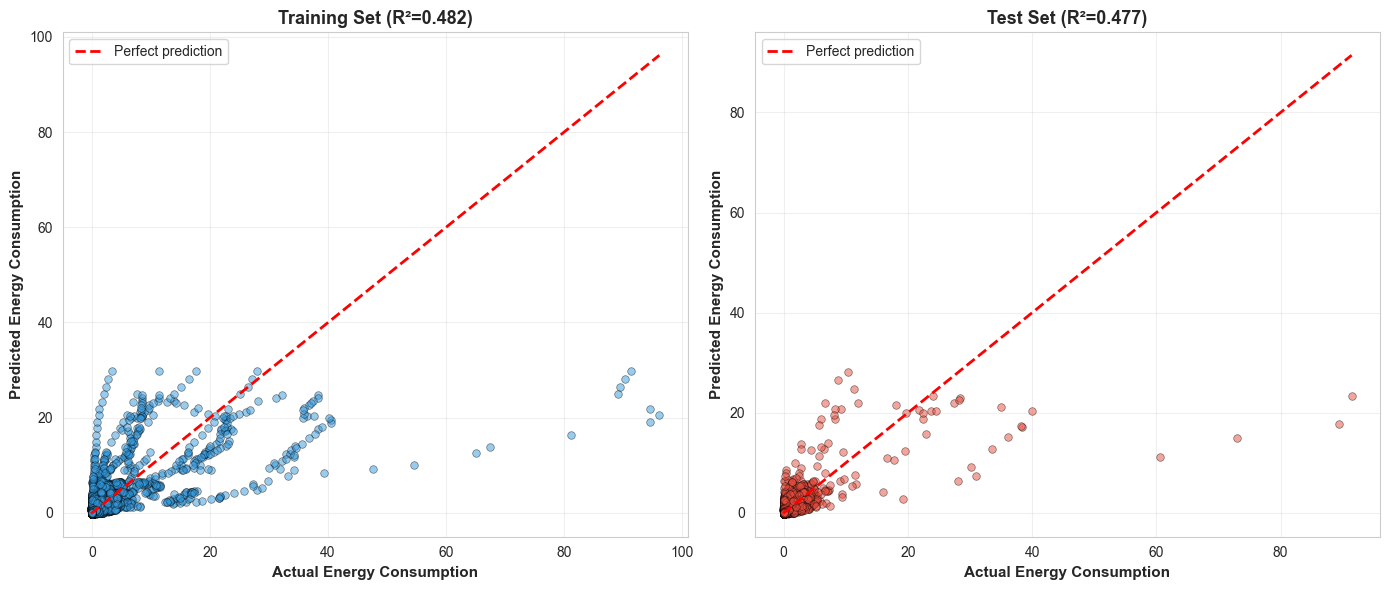


📊 Interpretation: R² of 0.477 means the model explains 47.7% of variance in energy consumption.


In [9]:
# Visualisation: Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Training set
axes[0].scatter(y_train_reg, y_pred_train, alpha=0.5, s=30, color='#3498db', edgecolors='black', linewidth=0.5)
axes[0].plot([y_train_reg.min(), y_train_reg.max()], [y_train_reg.min(), y_train_reg.max()], 
             'r--', linewidth=2, label='Perfect prediction')
axes[0].set_xlabel('Actual Energy Consumption', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Predicted Energy Consumption', fontsize=11, fontweight='bold')
axes[0].set_title(f'Training Set (R²={train_r2:.3f})', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(y_test_reg, y_pred_test, alpha=0.5, s=30, color='#e74c3c', edgecolors='black', linewidth=0.5)
axes[1].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 
             'r--', linewidth=2, label='Perfect prediction')
axes[1].set_xlabel('Actual Energy Consumption', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Predicted Energy Consumption', fontsize=11, fontweight='bold')
axes[1].set_title(f'Test Set (R²={test_r2:.3f})', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Interpretation: R² of {test_r2:.3f} means the model explains {test_r2*100:.1f}% of variance in energy consumption.")

## 3. K-Means Clustering - Country Grouping

### Objective
Group countries based on their energy consumption, GDP, CO₂ emissions, and population profiles.

### Why K-Means?
- Unsupervised learning - no labels needed
- Identifies natural groupings in data
- Useful for market segmentation and pattern discovery

In [10]:
# Prepare data for clustering (aggregate by country)
cluster_df = df.groupby('Country').agg({
    'Energy_consumption': 'mean',
    'GDP': 'mean',
    'CO2_emission': 'mean',
    'Population': 'mean'
}).reset_index()

cluster_df = cluster_df.dropna()
print(f"Dataset size: {len(cluster_df)} countries")

# Features for clustering
X_cluster = cluster_df[['Energy_consumption', 'GDP', 'CO2_emission', 'Population']]

# Scale features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

Dataset size: 203 countries


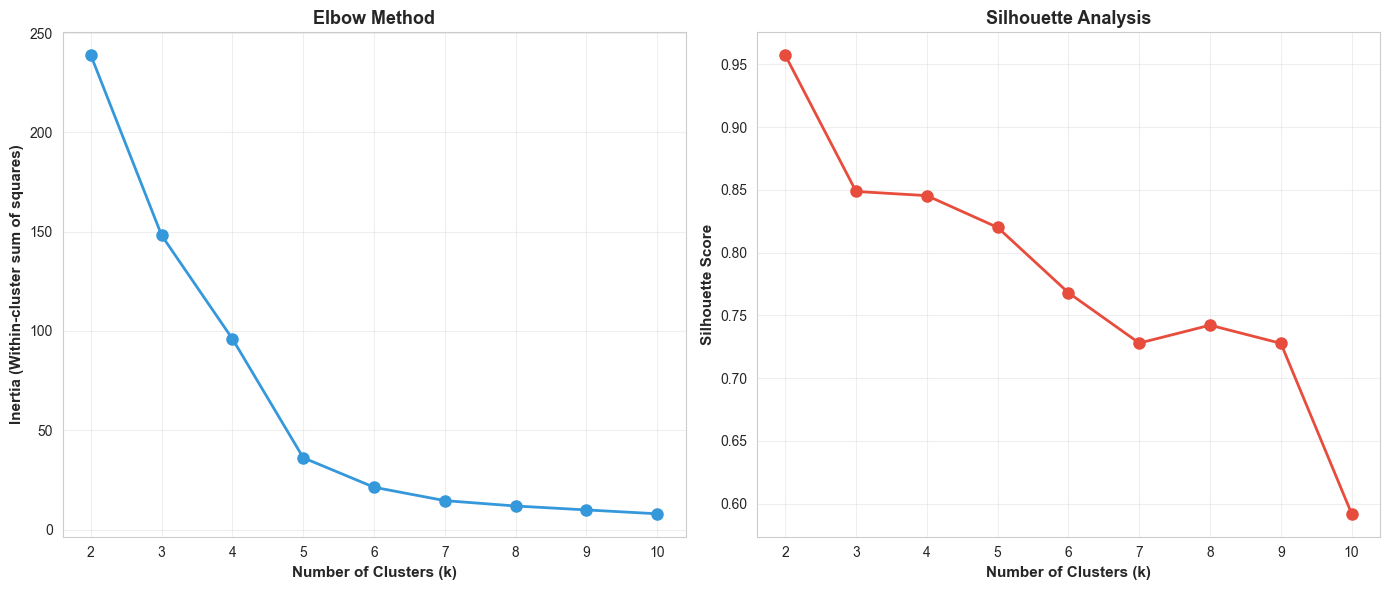


💡 Look for the 'elbow' in the first plot and the peak in the second plot to choose optimal k.


In [11]:
# Find optimal number of clusters using elbow method and silhouette analysis
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))

# Plot optimization metrics
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(K_range, inertias, marker='o', linewidth=2, markersize=8, color='#3498db')
axes[0].set_xlabel('Number of Clusters (k)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Inertia (Within-cluster sum of squares)', fontsize=11, fontweight='bold')
axes[0].set_title('Elbow Method', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, marker='o', linewidth=2, markersize=8, color='#e74c3c')
axes[1].set_xlabel('Number of Clusters (k)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontsize=11, fontweight='bold')
axes[1].set_title('Silhouette Analysis', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Look for the 'elbow' in the first plot and the peak in the second plot to choose optimal k.")